In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
df=pd.read_csv(r'C:\Users\julia\OneDrive\Рабочий стол\Валики 01.05.2023-16.07.2023.csv', delimiter=";")
df

,Дата,Продажи шт,ФРЦ,День недели,ЗП/Аванс,Доля от продаж в родительской категории стоимость,Доля от продаж в родительской категории количество,Рейтинг бренда в родительской категории,Доля от продаж в родительской категории стоимость(FFM спортивные акссесуары),Доля от продаж в родительской категории количество(FFM спортивные акссесуары),Рейтинг бренда в родительской категории(FFM спортивные акссесуары),Коэффициент сезонности
0,01.05.2023,31,1000.05,1,0,0.06,0.10,169,0.12,0.09,168,4.90
1,02.05.2023,41,1000.05,2,0,0.07,0.11,164,0.10,0.07,200,4.86
2,03.05.2023,29,900.00,3,0,0.04,0.07,201,0.09,0.07,211,4.81
3,04.05.2023,27,1000.05,4,0,0.05,0.08,209,0.13,0.09,146,4.76
4,05.05.2023,19,921.30,5,0,0.04,0.07,205,0.09,0.06,237,4.71
...,...,...,...,...,...,...,...,...,...,...,...,...
72,12.07.2023,378,646.36,3,1,0.16,0.29,63,0.39,0.46,19,-11.70
73,13.07.2023,407,640.02,4,1,0.14,0.29,75,0.42,0.50,18,-11.44
74,14.07.2023,446,646.22,5,1,0.14,0.29,68,0.42,0.50,23,-11.16
75,15.07.2023,183,655.34,6,1,0.14,0.28,62,0.41,0.49,21,-11.87


C:\Users\julia\AppData\Local\Temp\ipykernel_8660\1627414714.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)


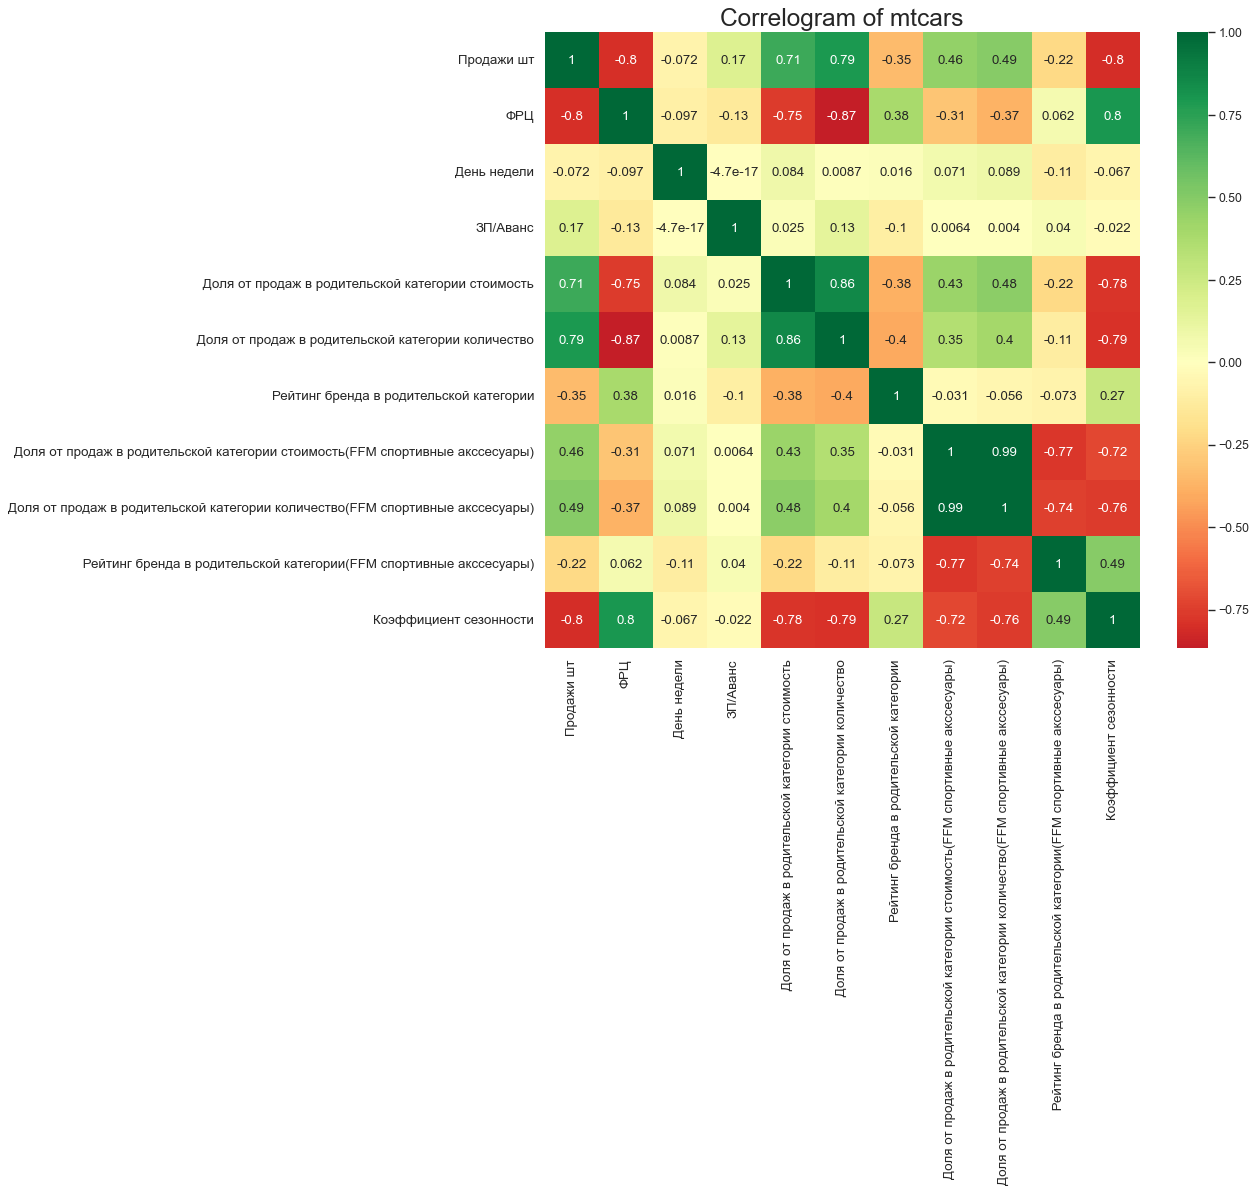

In [137]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Поочередно уберем из модели независимые переменные, чтобы найти максимально эффективную модель

## Первоночальная модель: 

In [153]:
y = df['Продажи шт']
X = df[['ФРЦ',' Доля от продаж в родительской категории стоимость',
        ' Доля от продаж в родительской категории количество','Рейтинг бренда в родительской категории',
        'Доля от продаж в родительской категории стоимость(FFM спортивные акссесуары)',
        'Доля от продаж в родительской категории количество(FFM спортивные акссесуары)',
        ' Рейтинг бренда в родительской категории(FFM спортивные акссесуары)','Коэффициент сезонности']]
model = ols('y ~ X', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     25.12
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           1.65e-17
Time:                        02:29:24   Log-Likelihood:                -422.64
No. Observations:                  77   AIC:                             863.3
Df Residuals:                      68   BIC:                             884.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    297.8001    178.153      1.672      0.0

## Без 'Коэффициент сезонности' :


In [130]:
y = df['Продажи шт']
X = df[['ФРЦ',' Доля от продаж в родительской категории стоимость',
        ' Доля от продаж в родительской категории количество','Рейтинг бренда в родительской категории',
        'Доля от продаж в родительской категории стоимость(FFM спортивные акссесуары)',
        'Доля от продаж в родительской категории количество(FFM спортивные акссесуары)',
        ' Рейтинг бренда в родительской категории(FFM спортивные акссесуары)']]
model = ols('y ~ X', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     25.27
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           9.74e-17
Time:                        02:06:47   Log-Likelihood:                -426.65
No. Observations:                  77   AIC:                             869.3
Df Residuals:                      69   BIC:                             888.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    517.9565    166.192      3.117      0.0

## Без: ' Рейтинг бренда в родительской категории(FFM спортивные акссесуары)'

In [132]:
y = df['Продажи шт']
X = df[['ФРЦ',' Доля от продаж в родительской категории стоимость',
        ' Доля от продаж в родительской категории количество','Рейтинг бренда в родительской категории',
        'Доля от продаж в родительской категории стоимость(FFM спортивные акссесуары)',
        'Доля от продаж в родительской категории количество(FFM спортивные акссесуары)',
        'Коэффициент сезонности']]
model = ols('y ~ X', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     28.23
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           6.44e-18
Time:                        02:07:19   Log-Likelihood:                -423.54
No. Observations:                  77   AIC:                             863.1
Df Residuals:                      69   BIC:                             881.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    382.7735    165.830      2.308      0.0

## Без: 'Доля от продаж в родительской категории количество(FFM спортивные акссесуары)'

In [155]:
y = df['Продажи шт']
X = df[['ФРЦ',' Доля от продаж в родительской категории стоимость',
        ' Доля от продаж в родительской категории количество','Рейтинг бренда в родительской категории',
        'Доля от продаж в родительской категории стоимость(FFM спортивные акссесуары)',
        ' Рейтинг бренда в родительской категории(FFM спортивные акссесуары)','Коэффициент сезонности']]
model = ols('y ~ X', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     26.72
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           2.51e-17
Time:                        02:30:53   Log-Likelihood:                -425.10
No. Observations:                  77   AIC:                             866.2
Df Residuals:                      69   BIC:                             884.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    347.2857    181.021      1.918      0.0

## Без: 'Доля от продаж в родительской категории стоимость(FFM спортивные акссесуары)'

In [156]:
y = df['Продажи шт']
X = df[['ФРЦ',' Доля от продаж в родительской категории стоимость',
        ' Доля от продаж в родительской категории количество','Рейтинг бренда в родительской категории',
        'Доля от продаж в родительской категории количество(FFM спортивные акссесуары)',
        ' Рейтинг бренда в родительской категории(FFM спортивные акссесуары)','Коэффициент сезонности']]
model = ols('y ~ X', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     26.64
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           2.72e-17
Time:                        02:31:17   Log-Likelihood:                -425.19
No. Observations:                  77   AIC:                             866.4
Df Residuals:                      69   BIC:                             885.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    341.1526    181.644      1.878      0.0

## Без: 'Рейтинг бренда в родительской категории'

In [140]:
y = df['Продажи шт']
X = df[['ФРЦ',' Доля от продаж в родительской категории стоимость',
        ' Доля от продаж в родительской категории количество',
        'Доля от продаж в родительской категории стоимость(FFM спортивные акссесуары)',
        'Доля от продаж в родительской категории количество(FFM спортивные акссесуары)',
        ' Рейтинг бренда в родительской категории(FFM спортивные акссесуары)','Коэффициент сезонности']]
model = ols('y ~ X', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     28.87
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           3.69e-18
Time:                        02:17:10   Log-Likelihood:                -422.91
No. Observations:                  77   AIC:                             861.8
Df Residuals:                      69   BIC:                             880.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    292.7745    177.317      1.651      0.1

### Без: ' Доля от продаж в родительской категории количество'

In [141]:
y = df['Продажи шт']
X = df[['ФРЦ',' Доля от продаж в родительской категории стоимость',
        'Рейтинг бренда в родительской категории',
        'Доля от продаж в родительской категории стоимость(FFM спортивные акссесуары)',
        'Доля от продаж в родительской категории количество(FFM спортивные акссесуары)',
        ' Рейтинг бренда в родительской категории(FFM спортивные акссесуары)','Коэффициент сезонности']]
model = ols('y ~ X', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     28.19
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           6.66e-18
Time:                        02:19:03   Log-Likelihood:                -423.58
No. Observations:                  77   AIC:                             863.2
Df Residuals:                      69   BIC:                             881.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    405.2329    158.482      2.557      0.0

## Без: ' Доля от продаж в родительской категории стоимость'

In [145]:
y = df['Продажи шт']
X = df[['ФРЦ',
        ' Доля от продаж в родительской категории количество','Рейтинг бренда в родительской категории',
        'Доля от продаж в родительской категории стоимость(FFM спортивные акссесуары)',
        'Доля от продаж в родительской категории количество(FFM спортивные акссесуары)',
        ' Рейтинг бренда в родительской категории(FFM спортивные акссесуары)','Коэффициент сезонности']]
model = ols('y ~ X', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     29.01
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           3.25e-18
Time:                        02:21:41   Log-Likelihood:                -422.76
No. Observations:                  77   AIC:                             861.5
Df Residuals:                      69   BIC:                             880.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    299.7339    177.085      1.693      0.0

## Без ФРЦ

In [146]:
y = df['Продажи шт']
X = df[[' Доля от продаж в родительской категории стоимость',
        ' Доля от продаж в родительской категории количество','Рейтинг бренда в родительской категории',
        'Доля от продаж в родительской категории стоимость(FFM спортивные акссесуары)',
        'Доля от продаж в родительской категории количество(FFM спортивные акссесуары)',
        ' Рейтинг бренда в родительской категории(FFM спортивные акссесуары)','Коэффициент сезонности']]
model = ols('y ~ X', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     27.61
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           1.12e-17
Time:                        02:22:08   Log-Likelihood:                -424.17
No. Observations:                  77   AIC:                             864.3
Df Residuals:                      69   BIC:                             883.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.1589     51.924      0.273      0.7

In [152]:
y = df['Продажи шт']
X = df[['ФРЦ',' Доля от продаж в родительской категории стоимость',
        ' Доля от продаж в родительской категории количество','Рейтинг бренда в родительской категории',
        'Доля от продаж в родительской категории количество(FFM спортивные акссесуары)',
        ' Рейтинг бренда в родительской категории(FFM спортивные акссесуары)','Коэффициент сезонности']]
model = ols('y ~ X', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     26.64
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           2.72e-17
Time:                        02:28:48   Log-Likelihood:                -425.19
No. Observations:                  77   AIC:                             866.4
Df Residuals:                      69   BIC:                             885.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    341.1526    181.644      1.878      0.0

### ---------------------------------------------------------------------------------------------------------------------------------------------------------------

### Самый высокий коэффициент детерминации получился у модели без: ''Рейтинг бренда в родительской категории''. Выбираем эту модель для дальнейшей работы.

In [158]:
y = df['Продажи шт']
X = df[['ФРЦ',' Доля от продаж в родительской категории стоимость',
        ' Доля от продаж в родительской категории количество',
        'Доля от продаж в родительской категории стоимость(FFM спортивные акссесуары)',
        'Доля от продаж в родительской категории количество(FFM спортивные акссесуары)',
        ' Рейтинг бренда в родительской категории(FFM спортивные акссесуары)','Коэффициент сезонности']]
model = ols('y ~ X', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     28.87
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           3.69e-18
Time:                        02:38:02   Log-Likelihood:                -422.91
No. Observations:                  77   AIC:                             861.8
Df Residuals:                      69   BIC:                             880.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    292.7745    177.317      1.651      0.1

# Интерпретация:

- Я использую модель OLS(Метод наименьших квадратов).
- Коэффициеент детерминации равен 0,745, это означает, что 74,5% изменений количества продаж в штуках объясняется этой моделью.
- Результаты f-статистики и ее p-value(ошибка первого рода,т.е. если на самом деле нет никаких влияний независимых перменных на зависимую, а я отклоню эту гипотезу без оснований) но как раз низкое значение p-value в нашем случае 3.69e-18 ниже чем 0,05 является поводом для отклонение гипотезы о том, что влияния нет.
- значения coef, означают, что, например при изменение ФРЦ - X[0] на одну единицу , наши продажи изменяться на 0.3422 рубля, но при условии, что все остальные предикторы будут неизменными. 
- Если мы посмотрим на p-value t-статистики мы увидим, что есть значения с p-value > 0.05, это значит, что не зависимые переменные по отдельности не имеют влияния на зависимую переменную, но из пербора выше, мы делаем вывод, что вместе выстраивают максимально оптимальную модель для дальнейшей работы.
